Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64
Outliner indices in DSBDA -  []
the Shape of data after removing outliners -  (4, 8)


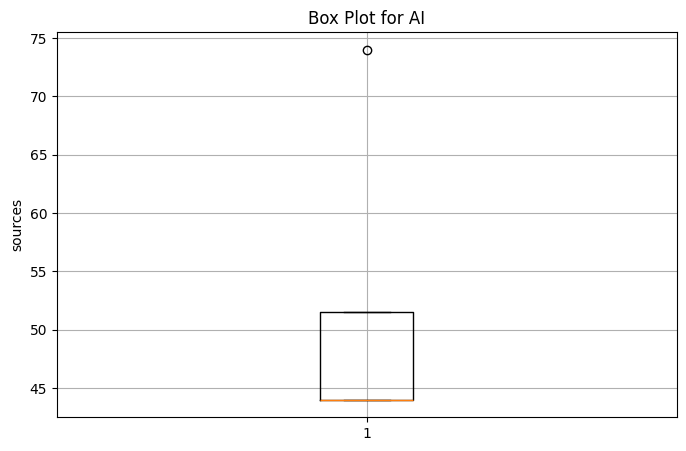

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

df = pd.read_csv('/content/dsbda_03.csv')

df['WT']=pd.to_numeric(df['WT'],errors='coerce')
df.dtypes
df['WT'] = df['WT'].fillna(df['WT'].mean())



for col in df.columns:
  if df[col].dtypes in ['int65','float65']:
    df[col] = df[col].fillna(df[col].mean())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])
missing_values=df.isnull().sum()
print(missing_values)

df['DSBDA'] = pd.to_numeric(df['DSBDA'],errors='coerce')
z_scores = zscore(df['DSBDA'])

outliners = np.where(np.abs(z_scores > 3))

print("Outliner indices in DSBDA - ",outliners[0])

df_no_outliers = df[(np.abs(zscore(df['DSBDA'])) <3 )]

print("the Shape of data after removing outliners - ",df_no_outliers.shape)

bins=[0,50,70,100]
labels=['low','medium','high']

df_no_outliers['performance'] = pd.cut(df_no_outliers['Average'],bins=bins,labels=labels)

plt.figure(figsize=(8,5))
plt.boxplot(df_no_outliers['AI'])
plt.title("Box Plot for AI")
plt.ylabel('sources')
plt.grid()
plt.show()